In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
data_size = X_train.shape[0]
batch_size = 12
selected = np.random.choice(data_size, batch_size)
print(selected)
x_batch = X_train[selected]
y_batch = y_train[selected]

[23056 16726 25710 50357 34114 37181 10935 23972 10934 31368 47140 16000]


# 미니배치 구현

In [ ]:
import numpy as np

# 시그모이드 함수
def actf(x):
	return 1/(1+np.exp(-x))

# 시그모이드 함수의 미분치
def actf_deriv(x):
	    return x*(1-x)

# 입력유닛의 개수, 은닉유닛의 개수, 출력유닛의 개수
inputs, hiddens, outputs = 2, 2, 1
learning_rate = 0.5

# 훈련 입력과 출력
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
T = np.array([[0], [1], [1], [0]])

# 가중치를 –1.0에서 1.0 사이의 난수로 초기화한다.
W1 = 2*np.random.random((inputs, hiddens))-1   
W2 = 2*np.random.random((hiddens, outputs))-1  
B1 = np.zeros(hiddens)   
B2 = np.zeros(outputs) 


In [ ]:
# 순방향 전파 계산
def predict(x):
        layer0 = x			# 입력을 layer0에 대입한다. 
        Z1 = np.dot(layer0, W1)+B1	# 행렬의 곱을 계산한다. 
        layer1 = actf(Z1)		# 활성화 함수를 적용한다. 
        Z2 = np.dot(layer1, W2)+B2	# 행렬의 곱을 계산한다. 
        layer2 = actf(Z2)		# 활성화 함수를 적용한다. 
        return layer0, layer1, layer2
    
# 역방향 전파 계산
def fit():
    global W1, W2, B1, B2
    for i in range(60000):
            layer0, layer1, layer2 = predict(X)
            layer2_error = layer2-T

            layer2_delta = layer2_error*actf_deriv(layer2)
            layer1_error = np.dot(layer2_delta, W2.T)
            layer1_delta = layer1_error*actf_deriv(layer1)
            
            W2 += -learning_rate*np.dot(layer1.T, layer2_delta)/4.0
            W1 += -learning_rate*np.dot(layer0.T, layer1_delta)/4.0
            B2 += -learning_rate*np.sum(layer2_delta, axis=0)/4.0
            B1 += -learning_rate*np.sum(layer1_delta, axis=0)/4.0


In [ ]:
def test():
  for x, y in zip(X,T):
    x = np.reshape(x, (1,-1))
    layer0, layer1, layer2 = predict(x)
    print(x,y,layer2)

In [ ]:
fit()
test()

[[0 0]] [0] [[0.02216966]]
[[0 1]] [1] [[0.97488354]]
[[1 0]] [1] [[0.97488558]]
[[1 1]] [0] [[0.02356368]]


In [ ]:
# 에포크와 미니배치 변경
def fit():
    global W1, W2, B1, B2
    for i in range(600):
            layer0, layer1, layer2 = predict(X)
            layer2_error = layer2-T

            layer2_delta = layer2_error*actf_deriv(layer2)
            layer1_error = np.dot(layer2_delta, W2.T)
            layer1_delta = layer1_error*actf_deriv(layer1)
            
            W2 += -learning_rate*np.dot(layer1.T, layer2_delta)/1000.0
            W1 += -learning_rate*np.dot(layer0.T, layer1_delta)/1000.0
            B2 += -learning_rate*np.sum(layer2_delta, axis=0)/1000.0
            B1 += -learning_rate*np.sum(layer1_delta, axis=0)/1000.0

fit()
test()

[[0 0]] [0] [[0.02216824]]
[[0 1]] [1] [[0.97488515]]
[[1 0]] [1] [[0.97488719]]
[[1 1]] [0] [[0.02356216]]


# Keras 사용

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units = 2, input_shape=(2,), activation = 'sigmoid'))
model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

model.compile(loss = 'mean_squared_error', optimizer = tf.keras.optimizers.SGD(lr=0.3))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.fit(X,T,batch_size=1, epochs = 2000)

Epoch 1/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2687
Epoch 2/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2686
Epoch 3/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2686
Epoch 4/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2686
Epoch 5/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2686
Epoch 6/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2686
Epoch 7/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2684
Epoch 8/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2684
Epoch 9/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2683
Epoch 10/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2672
Epoch 11/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2672
Epoch 12/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2671
Epoch 13/2000
4/4 [==============================

In [ ]:
print(model.predict(X))

[[0.05058497]
 [0.94078684]
 [0.95457006]
 [0.0447534 ]]


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


# 케라스를 사용하는 3가지 방법 
### (1) sequential 모델을 만들고 모델에 필요한 레이터를 추가하는 방법

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units = 2, input_shape=(2,), activation = 'sigmoid'))

model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

### (2)함수형 API를 사용하는 방법

inputs = input(shape=(2,))

x = Dense(2, activation = "sigmoid")(x)

prediction = Dense(1, activation = "sigmoid")(x)

model = Model(inputs = inputs, output = prediction)

### (3)model 클래스를 상속받아서 우리 나름대로의 클래스를 정의하는 방법

class SimpleMLP(Model):

    def __init__(self, num_classes):	# 생성자 작성
        super(SimpleMLP, self).__init__(name='mlp')
        self.num_classes = num_classes

        self.dense1 = Dense(32, activation='sigmoid')
        self.dense2 = Dense(num_classes, activation='sigmoid')

    def call(self, inputs):		# 순방향 호출을 구현한다. 
        x = self.dense1(inputs)
        return self.dense2(x)
model = SimpleMLP()

model.compile(...)

model.fit(...)

# mnist 필기체 인식

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

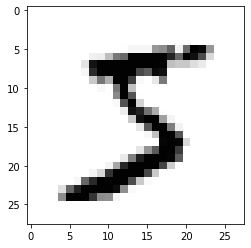

In [ ]:
plt.imshow(train_images[0], cmap = "Greys")

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(512, activation="relu", input_shape = (784,)))
model.add(tf.keras.layers.Dense(10,activation = "softmax"))

In [ ]:
model.compile(optimizer = "rmsprop",loss = 'mse', metrics = ['accuracy']  )

In [ ]:
train_images = train_images.reshape((60000, 784))
train_images = train_images.astype('float32') / 255.0

test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32') / 255.0

In [ ]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [ ]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0121 - accuracy: 0.9226
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0053 - accuracy: 0.9662
Epoch 3/5
469/469 [==============================] - 5s 12ms/step - loss: 0.0037 - accuracy: 0.9772
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0028 - accuracy: 0.9828
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0022 - accuracy: 0.9869


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0032 - accuracy: 0.9799
테스트 정확도: 0.9799000024795532


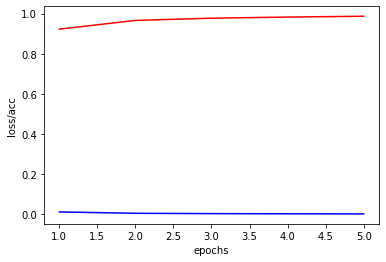

In [ ]:
loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, acc, 'r', label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('loss/acc')
plt.show()


# 실제 이미지로 test

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


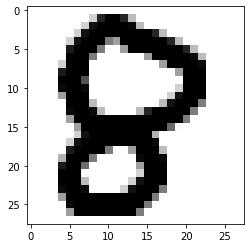

In [ ]:
import cv2 as cv

image = cv.imread('/content/gdrive/MyDrive/딥러닝 특론 수업/data/test8.png', cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (28, 28))
image = image.astype('float32')
image = image.reshape(1, 784)
image = 255-image
image /= 255.0

plt.imshow(image.reshape(28, 28),cmap='Greys')
plt.show()

In [ ]:
pred = model.predict(image.reshape(1,784), batch_size=1)
print("추정된 숫자 = ", pred.argmax())

추정된 숫자 =  6


# 그리드 검색 예제

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# 데이터 세트 준비
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
# 신경망 모델 구축
def build_model():
    network = tf.keras.models.Sequential()
    network = tf.keras.models.Sequential()
    network.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
    network.add(tf.keras.layers.Dense(10, activation='sigmoid'))

    network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    return network

param_grid = {
              'epochs':[1, 2, 3],	# 에포크 수: 1, 2, 3
              'batch_size':[32, 64]	# 배치 크기: 32, 64
             }

In [3]:
model = KerasClassifier(build_fn = build_model, verbose=1)

# 그리드 검색
gs = GridSearchCV(
    estimator=model,
    param_grid=param_grid, 
    cv=3, 
    n_jobs=-1 
)

# 그리드 검색 결과 출력
grid_result = gs.fit(train_images, train_labels)
print(grid_result.best_score_)
print(grid_result.best_params_)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/3
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2054 - accuracy: 0.9392
Epoch 2/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0905 - accuracy: 0.9740
Epoch 3/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0640 - accuracy: 0.9816
0.9711833397547404
{'batch_size': 32, 'epochs': 3}
